# Pymaceuticals Inc.
---

### Analysis

- Of the 4 drug regimens analyzed, Capomulin and Ramicane were the most effective at decreasing tumor size. The least effective were Infubinol and Ceftamin. This is based on the box plots of the final measured tumor volumes.

- Since the P-Value is .84 this indicates there is linear correlation and a positive relationship between weight and tumor volume. The lower the weight of the mouse, the smaller the tumor size.

- As timepoints increased over time, Capomulin Treatment of Mouse l509 is shown as effective - decreasing tumor size, lower variance suggesting less dispersion of data. As a researcher, I would suggest continuing testing with Capomulin.

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combine_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [93]:
# Checking the number of mice.
combine_data['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [94]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combine_data.loc[combine_data.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [95]:
# # Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice = combine_data.set_index('Mouse ID')
duplicate_mice.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [96]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_df = duplicate_mice.drop(['g989'])
duplicate_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [97]:
# Checking the number of mice in the clean DataFrame.
duplicate_df = duplicate_df.reset_index()
duplicate_df['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM (standard error of the mean) of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = duplicate_df.groupby(['Drug Regimen'])

tumor_mean = summary_df['Tumor Volume (mm3)'].mean().round(2)
tumor_median = summary_df['Tumor Volume (mm3)'].median().round(2)
tumor_var = summary_df['Tumor Volume (mm3)'].var().round(2)
tumor_std= summary_df['Tumor Volume (mm3)'].std().round(2)
tumor_sem= summary_df['Tumor Volume (mm3)'].sem().round(2)

summary_df = pd.DataFrame({
                        "Mean": tumor_mean, "Median": tumor_median,
                        "Variance": tumor_var, "Standard Deviation": tumor_std, "SEM": tumor_sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_df = duplicate_df.groupby('Drug Regimen')
summary_table_df = summary_df.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_table_df.round(2)


/var/folders/44/t3ppwczj0cv8m73pmhbx43r40000gn/T/ipykernel_72877/2004570724.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_table_df = summary_df.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [100]:
#Array that contains the number of mice each drug regimen has
total_mice = duplicate_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
total_mice

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

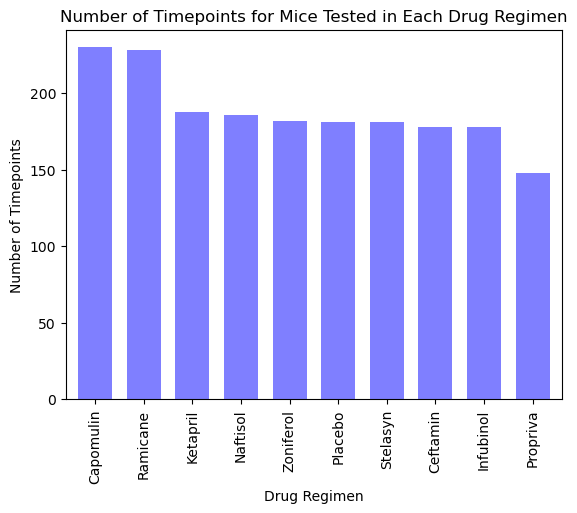

In [101]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse = "Mouse ID"
mice_timepoints = duplicate_df.groupby(['Drug Regimen']).count()[mouse]

mice_timepoints.sort_values(ascending=False).plot.bar(color ='b', alpha=0.5, width=0.7, align="center")

#label the y axis, x axis
plt.title("Number of Timepoints for Mice Tested in Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.show()

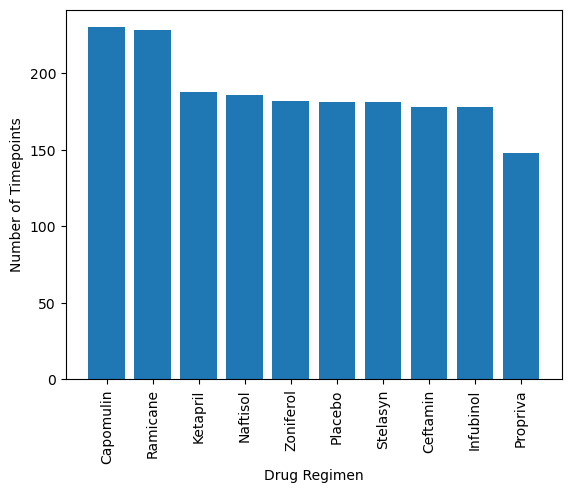

In [102]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_desc = mice_timepoints.sort_values(ascending=False) 
plt.bar(timepoint_desc.index, timepoint_desc.values) 

#label the y axis, x axis
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen") 

#Tick positions
plt.xticks(rotation='vertical')

plt.show()

([<matplotlib.patches.Wedge at 0x7fbbd1d18160>,
 [Text(0.03455180204558458, -1.0994572174374968, 'Male'),
  Text(-0.034551802045584445, 1.0994572174374968, 'Female')],
 [Text(0.01884643747940977, -0.5997039367840891, '51.0%'),
  Text(-0.018846437479409693, 0.5997039367840891, '49.0%')])

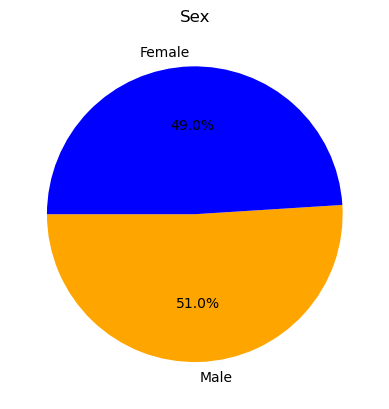

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Group by sex then a count
sex = duplicate_df.groupby(["Sex"])["Sex"].count()

# Labels for the sections of our pie chart
labels = ["Male", "Female"]
plt.title("Sex")


# The values of each section of the pie chart
percent = [51.0, 49.0]

# The colors of each section of the pie chart
colors = ["orange", "blue"]

plt.pie(percent, labels=labels, colors=colors, startangle=180, autopct="%1.1f%%")


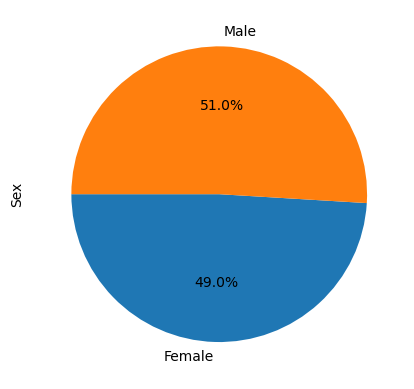

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=("Female", "Male"), startangle=180, autopct="%1.1f%%")

#Titles the pie chart
plt.ylabel("Sex")

#Format the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = duplicate_df.groupby("Mouse ID")["Timepoint"].max()
max_time_df = pd.DataFrame(max_timepoint)

max_tm_df = pd.merge(duplicate_df, max_time_df, on=("Mouse ID", "Timepoint"), how='right')
max_tm_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [106]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for value in treatments:

    tumor_vol = max_tm_df.loc[max_tm_df["Drug Regimen"] == value,"Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)

    # Calculate interquartile range for each regimen
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {value}: {iqr}")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)    
    print(f"Values below {lower_bound} could be outliers for {value}.")
    print(f"Values above {upper_bound} could be outliers for {value}.")

IQR for Capomulin: 7.781863460000004
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
IQR for Ramicane: 9.098536719999998
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
IQR for Infubinol: 11.477135160000003
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
IQR for Ceftamin: 15.577752179999997
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.


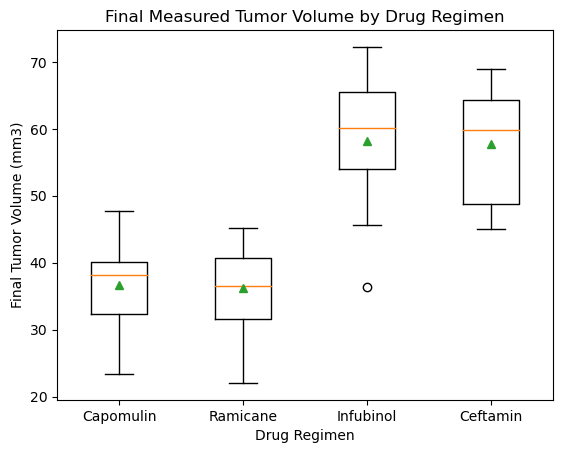

In [107]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = treatments, showmeans = True)
plt.title('Final Measured Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()


## Line and Scatter Plots

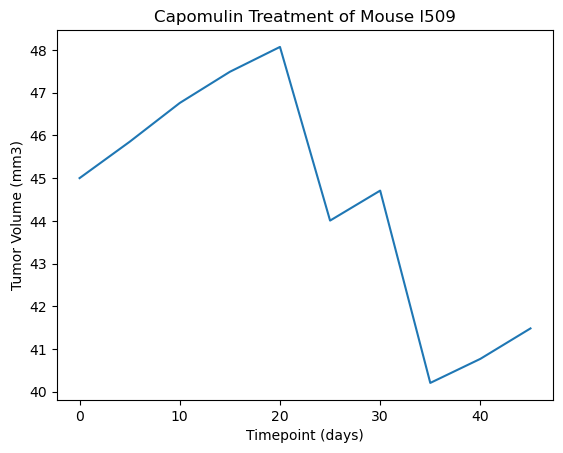

In [108]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_cap = duplicate_df.loc[duplicate_df["Mouse ID"] == "l509"]
plt.plot(mouse_cap["Timepoint"], mouse_cap["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

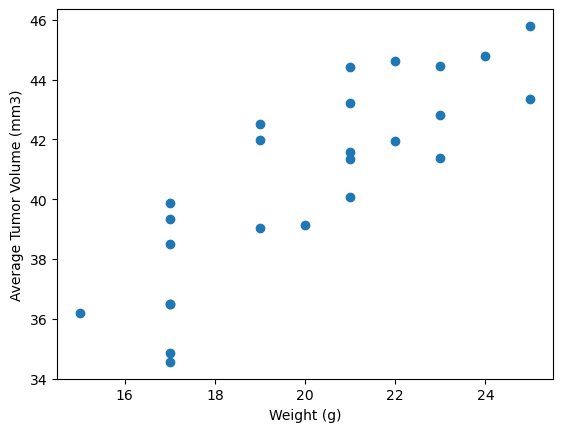

In [109]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap = duplicate_df.loc[duplicate_df["Drug Regimen"] == "Capomulin"]
cap_avg = cap.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [110]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

cap = duplicate_df.loc[duplicate_df["Drug Regimen"] == "Capomulin"]
cap_avg = cap.groupby(["Mouse ID"]).mean()
correlation = (st.pearsonr(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


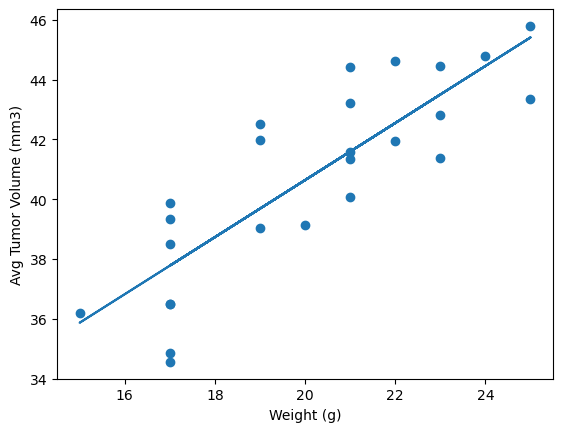

In [111]:
# Create equation of line to calculate predicted number
x_value = cap_avg["Weight (g)"]
y_value = cap_avg["Tumor Volume (mm3)"]

cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
cap_fit = cap_slope * cap_avg["Weight (g)"] + cap_int

plt.plot(cap_avg["Weight (g)"],cap_fit)
plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()
